Data Segmentation

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [6]:
df = pd.read_csv('data_cleaned.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_10064\2599512217.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


In [7]:
df['Risk'] = df['TotalClaims'] / df['TotalPremium']
df['ProfitMargin'] = df['TotalPremium'] - df['TotalClaims']

In [8]:
df.dropna(subset=['Risk', 'ProfitMargin'], inplace=True)

In [9]:
def perform_ttest(group_a, group_b, col):
    stat, p_value = ttest_ind(group_a[col], group_b[col], nan_policy='omit')
    return p_value

In [10]:
def perform_chi2test(group_a, group_b, col):
    contingency_table = pd.crosstab(group_a[col], group_b[col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

In [11]:
def print_result(p_value, hypothesis):
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {hypothesis}")
    else:
        print(f"Fail to reject the null hypothesis: {hypothesis}")

In [12]:
def visualize_groups(group_a, group_b, col, group_name, xlabel, ylabel):
  
    combined = pd.concat([group_a.assign(Group=group_name[0]), group_b.assign(Group=group_name[1])])

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=col, data=combined)
    plt.title(f'Boxplot of {ylabel} by Group')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Group', y=col, data=combined, estimator=np.mean, ci='sd')
    plt.title(f'Mean {ylabel} Comparison by Group')
    plt.xlabel(xlabel)
    plt.ylabel(f'Mean {ylabel}')
    plt.show()


Hypothesis 1: No risk differences across provinces
Gauteng sample size: 240883
Western Cape sample size: 96789
Fail to reject the null hypothesis: There are no risk differences between Gauteng and Western Cape


c:\Users\USER\Documents\OPLearning\10_Academy\Week_3\ven\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


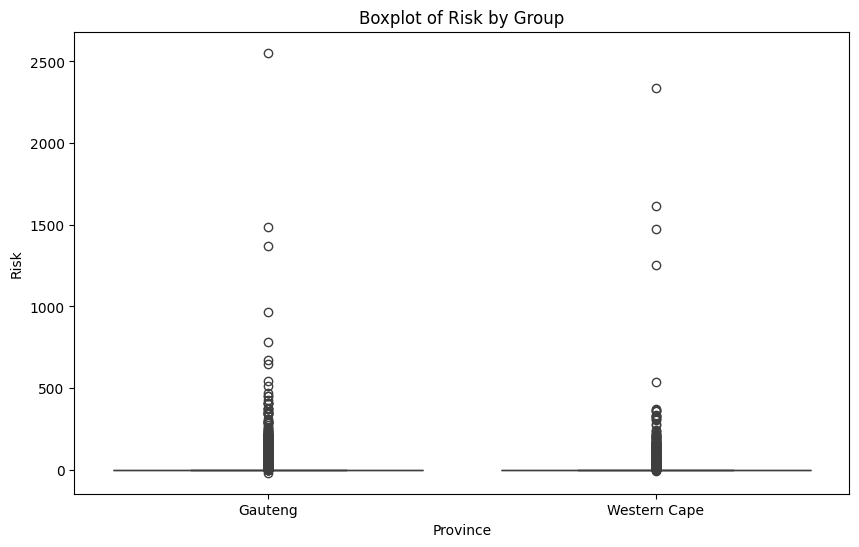

C:\Users\USER\AppData\Local\Temp\ipykernel_10064\1931128069.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y=col, data=combined, estimator=np.mean, ci='sd')


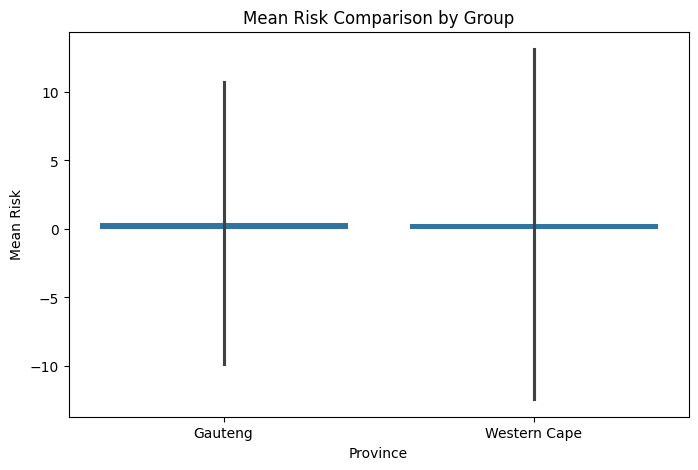

In [40]:
# Hypothesis 1: No risk differences across provinces
print("\nHypothesis 1: No risk differences across provinces")


province_a_name = 'Gauteng'
province_b_name = 'Western Cape'


province_a = df[df['Province'] == province_a_name]
province_b = df[df['Province'] == province_b_name]


print(f"{province_a_name} sample size: {len(province_a)}")
print(f"{province_b_name} sample size: {len(province_b)}")


p_value = perform_ttest(province_a, province_b, 'Risk')
print_result(p_value, f"There are no risk differences between {province_a_name} and {province_b_name}")


visualize_groups(province_a, province_b, 'Risk', [province_a_name, province_b_name], 'Province', 'Risk')



Hypothesis 2: No risk differences between zip codes
Postal code 1459 sample size: 401
Postal code 1513 sample size: 72
Fail to reject the null hypothesis: There are no risk differences between postal codes 1459 and 1513


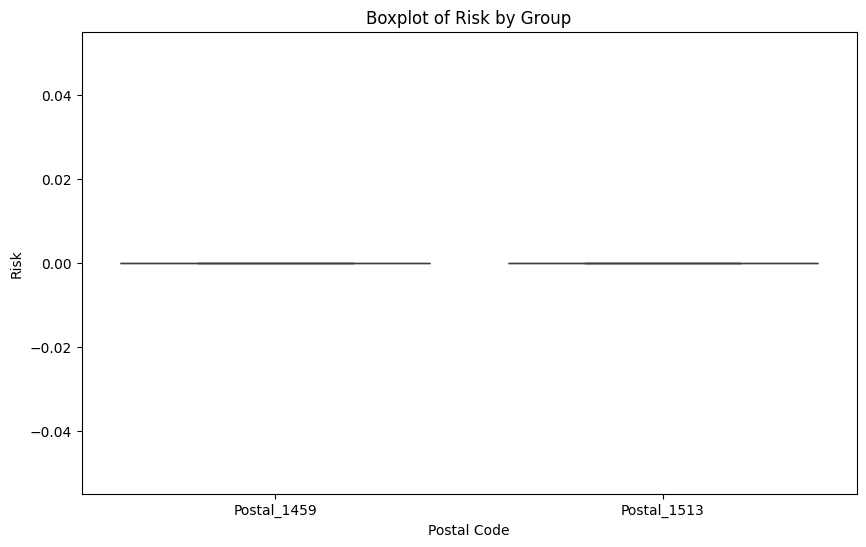

C:\Users\USER\AppData\Local\Temp\ipykernel_10064\1931128069.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y=col, data=combined, estimator=np.mean, ci='sd')


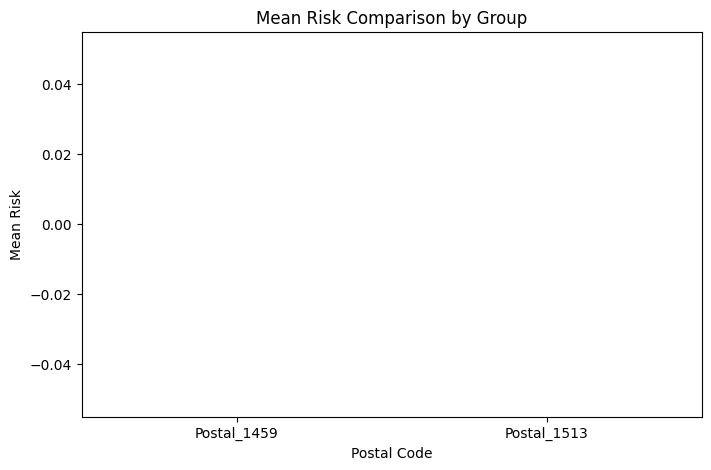

In [41]:

# Hypothesis 2: No risk differences between zip codes
print("\nHypothesis 2: No risk differences between zip codes")


postal_a_code = df['PostalCode'].unique()[0]  
postal_b_code = df['PostalCode'].unique()[1]  

postal_a = df[df['PostalCode'] == postal_a_code]
postal_b = df[df['PostalCode'] == postal_b_code]


print(f"Postal code {postal_a_code} sample size: {len(postal_a)}")
print(f"Postal code {postal_b_code} sample size: {len(postal_b)}")


p_value = perform_ttest(postal_a, postal_b, 'Risk')
print_result(p_value, f"There are no risk differences between postal codes {postal_a_code} and {postal_b_code}")


visualize_groups(postal_a, postal_b, 'Risk', [f'Postal_{postal_a_code}', f'Postal_{postal_b_code}'], 'Postal Code', 'Risk')